In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

row_training_data = pd.read_csv('data/train.csv')
row_test_data = pd.read_csv('data/test.csv')

In [128]:
row_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ KB


Basic statistical description:

In [107]:
row_training_data.describe()

/Users/alex/anaconda3/envs/testenv/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


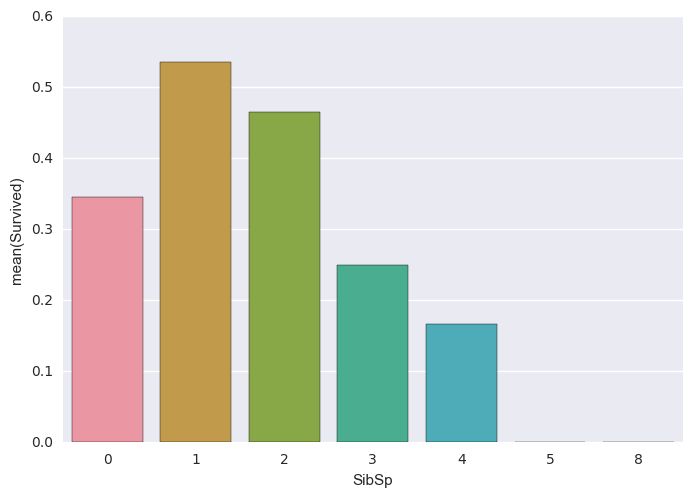

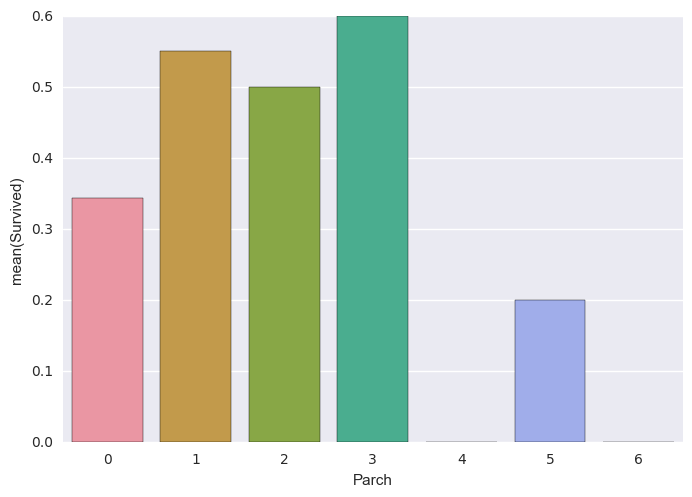

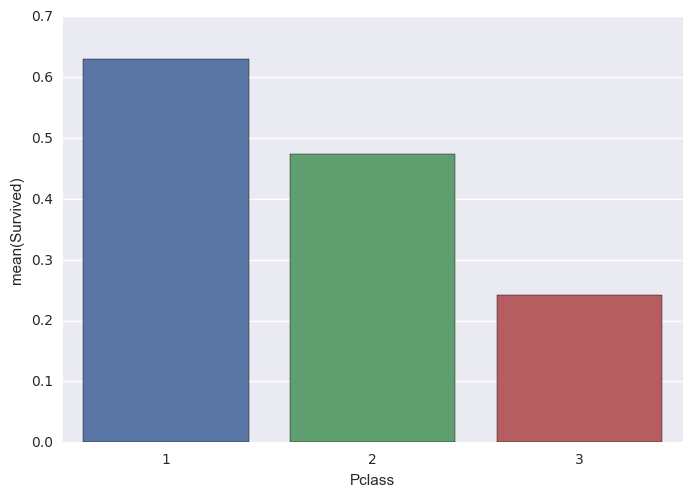

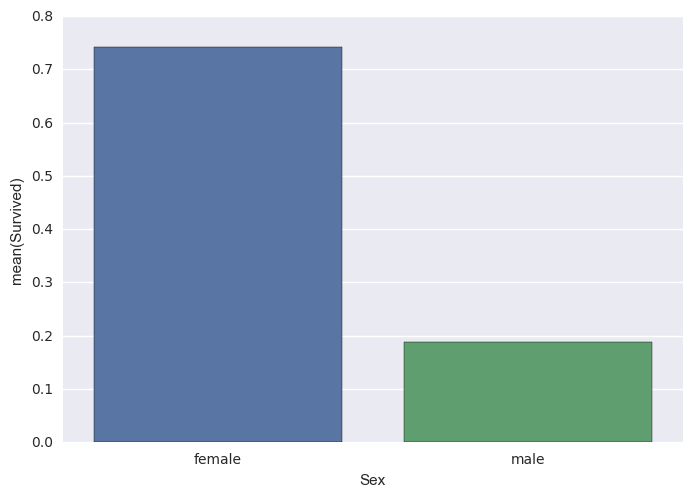

In [129]:
# Exploring data
# Survived by number of siblings/spouses aboard size
plot_data = row_training_data[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()
sns.barplot(x='SibSp', y='Survived', data=plot_data)
sns.plt.show()
# Survived by number of parents/children aboard
plot_data = row_training_data[['Parch', 'Survived']].groupby('Parch', as_index=False).mean()
sns.barplot(x='Parch', y='Survived', data=plot_data)
sns.plt.show()
# Survived by class
plot_data = row_training_data[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=plot_data)
sns.plt.show()
# Survived by sex
plot_data = row_training_data[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()
sns.barplot(x='Sex', y='Survived', data=plot_data)
sns.plt.show()

In [109]:
def clean_data(df):
    # Create 'Title' feature
    title = df.Name.map(lambda x: re.compile(', (.*?)\.').findall(x)[0])
    title[title=='Mme'] = 'Mrs'
    title[title.isin(['Ms','Mlle'])] = 'Miss'
    title[title.isin(['Don', 'Jonkheer'])] = 'Sir'
    title[title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'
    title[title.isin(['Capt', 'Col', 'Major', 'Dr', 'Officer', 'Rev'])] = 'Officer'
    df['Title'] = title
    # Combine number of siblings and parents into a 'FamilySize' column.
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    # Fill NA in Age column with median value
    median_age = df['Age'].median()
    df.Age.fillna(median_age, inplace=True)
    # Fill Embarked 
    emb_mode = df.Embarked.mode().values[0]
    df.Embarked.fillna(emb_mode, inplace=True)
    df['Embarked'] = df['Embarked'].map({'C':1, 'S':2, 'Q':3}).astype(int)
    # Convert categorial variables to the dummies
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex')], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Title'])], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Pclass'], prefix='Pclass')], axis=1)
    # Drop useless columns
    df.drop(['Sex', 'Embarked', 'Title', 'SibSp', 'Parch', 'Pclass', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    return df

In [110]:
train_df = clean_data(row_training_data)
y = train_df.Survived
X = train_df.drop('Survived', axis=1).values[:, 1:]
train_df.head()

,PassengerId,Survived,Age,Fare,FamilySize,Embarked_1,Embarked_2,Embarked_3,Sex_female,Sex_male,Lady,Master,Miss,Mr,Mrs,Officer,Sir,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,7.2500,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,38.0,71.2833,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,26.0,7.9250,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,35.0,53.1000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,0,35.0,8.0500,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
# Use grid search to find best parameters of the RandomForestClassifier
parameter_grid = {
    'max_features': [0.5, 0.7, 1.],
    'max_depth': [5., None],
    'n_estimators': [75, 100, 125, 150, 200]
}
grid_search = GridSearchCV(RandomForestClassifier(n_estimators = 100), parameter_grid,
                            cv=5, verbose=3, n_jobs=-1)

grid_search.fit(X, y)
sorted(grid_search.grid_scores_, key=lambda x: x.mean_validation_score)
print("Best score equals to " + str(grid_search.best_score_))
rfc_params = grid_search.best_params_
# Train RandomForestClassifier with the best parameters
model = RandomForestClassifier(n_estimators=rfc_params['n_estimators'], 
                               max_depth=rfc_params['max_depth'], 
                               max_features=rfc_params['max_features'], random_state=42, criterion='entropy',
                               oob_score=True, min_samples_split=5)
model.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_features=0.5, max_depth=5.0, n_estimators=75 ................
[CV] max_features=0.5, max_depth=5.0, n_estimators=75 ................
[CV] max_features=0.5, max_depth=5.0, n_estimators=75 ................
[CV] max_features=0.5, max_depth=5.0, n_estimators=75 ................
[CV] max_features=0.5, max_depth=5.0, n_estimators=75 ................
[CV] max_features=0.5, max_depth=5.0, n_estimators=100 ...............
[CV] max_features=0.5, max_depth=5.0, n_estimators=100 ...............
[CV] max_features=0.5, max_depth=5.0, n_estimators=100 ...............
[CV]  max_features=0.5, max_depth=5.0, n_estimators=75, score=0.815642 -   0.2s
[CV] max_features=0.5, max_depth=5.0, n_estimators=100 ...............
[CV]  max_features=0.5, max_depth=5.0, n_estimators=75, score=0.837079 -   0.2s
[CV]  max_features=0.5, max_depth=5.0, n_estimators=75, score=0.797753 -   0.2s
[CV]  max_features=0.5, max_depth=5.0, n_estimators=75, sco

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.8s


[CV]  max_features=0.5, max_depth=5.0, n_estimators=150, score=0.821229 -   0.5s
[CV]  max_features=0.5, max_depth=5.0, n_estimators=150, score=0.825843 -   0.5s
[CV] max_features=0.5, max_depth=5.0, n_estimators=200 ...............
[CV] max_features=0.7, max_depth=5.0, n_estimators=75 ................
[CV]  max_features=0.5, max_depth=5.0, n_estimators=150, score=0.853107 -   0.5s
[CV] max_features=0.7, max_depth=5.0, n_estimators=75 ................
[CV]  max_features=0.5, max_depth=5.0, n_estimators=150, score=0.797753 -   0.5s
[CV] max_features=0.7, max_depth=5.0, n_estimators=75 ................
[CV]  max_features=0.5, max_depth=5.0, n_estimators=200, score=0.826816 -   0.6s
[CV] max_features=0.7, max_depth=5.0, n_estimators=75 ................
[CV]  max_features=0.7, max_depth=5.0, n_estimators=75, score=0.815642 -   0.2s
[CV] max_features=0.7, max_depth=5.0, n_estimators=75 ................
[CV]  max_features=0.7, max_depth=5.0, n_estimators=75, score=0.804469 -   0.2s
[CV] max_

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.1s


[CV]  max_features=0.7, max_depth=None, n_estimators=150, score=0.810056 -   0.6s
[CV] max_features=0.7, max_depth=None, n_estimators=200 ..............
[CV]  max_features=0.7, max_depth=None, n_estimators=150, score=0.815642 -   0.7s
[CV] max_features=0.7, max_depth=None, n_estimators=200 ..............
[CV]  max_features=0.7, max_depth=None, n_estimators=150, score=0.865169 -   0.7s
[CV] max_features=1.0, max_depth=None, n_estimators=75 ...............
[CV]  max_features=0.7, max_depth=None, n_estimators=150, score=0.807910 -   0.7s
[CV]  max_features=0.7, max_depth=None, n_estimators=150, score=0.780899 -   0.7s
[CV] max_features=1.0, max_depth=None, n_estimators=75 ...............
[CV] max_features=1.0, max_depth=None, n_estimators=75 ...............
[CV]  max_features=1.0, max_depth=None, n_estimators=75, score=0.793296 -   0.3s
[CV] max_features=1.0, max_depth=None, n_estimators=75 ...............
[CV]  max_features=0.7, max_depth=None, n_estimators=200, score=0.804469 -   0.9s
[

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    9.3s finished


Best score equals to 0.8338945005611672


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5.0, max_features=1.0, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=125, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [119]:
test_data = clean_data(row_test_data)
test_data.Fare.fillna(test_data.Fare.median(), inplace=True)
test_data.insert(loc=15, column='Sir', value=pd.Series(np.zeros_like(test_data['Mr'])))
print(test_data.head())
test_data = test_data.values
output = model.predict(test_data[:, 1:])

   PassengerId   Age     Fare  FamilySize  Embarked_1  Embarked_2  Embarked_3  \
0          892  34.5   7.8292           1         0.0         0.0         1.0   
1          893  47.0   7.0000           2         0.0         1.0         0.0   
2          894  62.0   9.6875           1         0.0         0.0         1.0   
3          895  27.0   8.6625           1         0.0         1.0         0.0   
4          896  22.0  12.2875           3         0.0         1.0         0.0   

   Sex_female  Sex_male  Lady  Master  Miss   Mr  Mrs  Officer  Sir  Pclass_1  \
0         0.0       1.0   0.0     0.0   0.0  1.0  0.0      0.0  0.0       0.0   
1         1.0       0.0   0.0     0.0   0.0  0.0  1.0      0.0  0.0       0.0   
2         0.0       1.0   0.0     0.0   0.0  1.0  0.0      0.0  0.0       0.0   
3         0.0       1.0   0.0     0.0   0.0  1.0  0.0      0.0  0.0       0.0   
4         1.0       0.0   0.0     0.0   0.0  0.0  1.0      0.0  0.0       0.0   

   Pclass_2  Pclass_3  
0 

In [120]:
result = np.c_[test_data[:, 0].astype(int), output.astype(int)]
df_result = pd.DataFrame(result[:,0:2], columns=['PassengerId', 'Survived'])

In [121]:
df_result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [122]:
df_result.to_csv('results/titanic_1-0.csv', index=False)
